# 案例1 使用线性回归预测波士顿房价

1 载入数据

In [1]:
#载入数据集
import numpy as np
from sklearn import datasets    #sklearn中的数据包（包括手写数字、波士顿房价等等）
from sklearn import metrics     #用于对模型的评价
from sklearn import model_selection as modsel #选择线性回归或者逻辑回归
from sklearn import linear_model
#不用写plot.show()
%matplotlib inline      
import matplotlib.pyplot as plt
plt.style.use('ggplot')

boston = datasets.load_boston()#载入数据
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
dir(boston) #以列表的形式来显示（data是房子特征部分，target是房价部分）

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
boston
boston.data.shape #（房子数据是506行，13列）

(506, 13)

In [4]:
boston.target.shape#（房价是506个）

(506,)

2 训练模型

In [5]:
linreg = linear_model.LinearRegression()#选取线性模型中的线性回归模型
linreg
# 把数据分为训练数据集和测试数据集(通过train_test_split)
X_train,X_test,y_train,y_test=modsel.train_test_split(boston.data,boston.target,test_size=0.1,
                                                     random_state=42)#训练部分和测试部分分开（random_state是种子，每次出来的随机序列一样）
#训练
linreg.fit(X_train,y_train) #（训练集样本和训练集标签）

#真实值和预测值的均方误差
metrics.mean_squared_error(y_train,linreg.predict(X_train))#metrics是测度（linreg.predict(X_train)表示训练集标签的预测值）
#linreg对象的score方法的是确定系数
linreg.score(X_train,y_train)#越接近1，表示拟合的越好（即R^2）

0.7375152736886281

3 测试模型

In [6]:
y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)


14.995852876582463

In [7]:
#测试数据集上的均方误差比训练数据集上的均方误差要小一些


4 画出数据

Text(0, 0.5, 'target value')

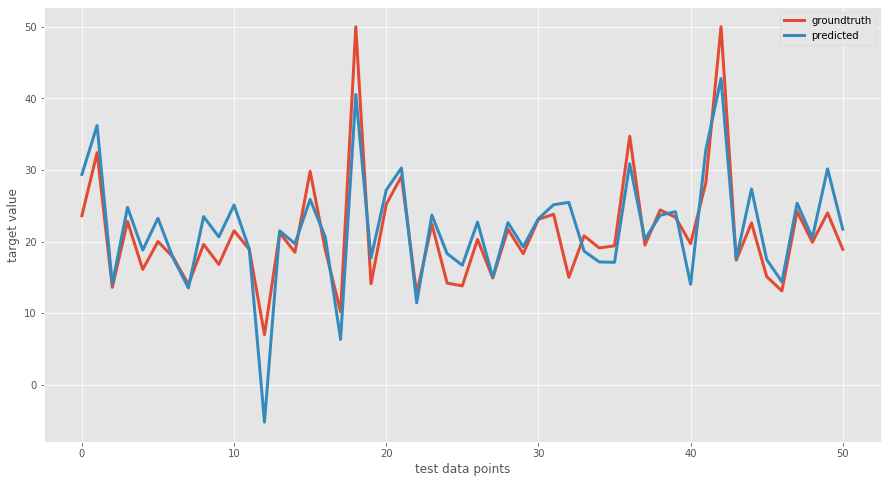

In [8]:
plt.figure(figsize=(15,8))#改变图形的长宽大小
plt.plot(y_test,lw=3,label='groundtruth')
plt.plot(y_pred,lw=3,label='predicted')
plt.legend(loc='best')#自动选一个最好的位置去放置
plt.xlabel('test data points')
plt.ylabel('target value')#目标值

Text(-5, 45, 'MSE = 14.996')

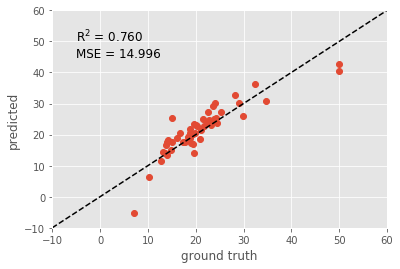

In [9]:
plt.plot(y_test,y_pred,'o')
plt.plot([-10,60],[-10,60],'k--')
plt.axis([-10,60,-10,60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr = r'R$^2$ = %.3f'%linreg.score(X_test,y_test) #r'R$^2$表示R的平方
errstr='MSE = %.3f'% metrics.mean_squared_error(y_test,y_pred)#（测试值与预测值得均方差）
plt.text(-5,50,scorestr,fontsize=12)#坐标和字体大小
plt.text(-5,45,errstr,fontsize=12)

# 案例2 广告与销售数据实战

In [10]:
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
import pandas as pd   #pandas用于读数据
from sklearn.model_selection import train_test_split #从模型选择工具包中导出用于划分训练集和测试集的工具
from sklearn.linear_model import Lasso, Ridge  #（Lasso是L1正则项，Ridge是L2正则项）
from sklearn.model_selection import GridSearchCV #GridSearchCV是一种模型
plt.style.use('ggplot')

# 读入数据



In [11]:
 # pandas读入
data = pd.read_csv('8.Advertising.csv')    # TV、Radio、Newspaper、Sales（data是一个列表）
x = data[['TV', 'Radio', 'Newspaper']]     #x是一个矩阵
# x = data[['TV', 'Radio']]                
y = data['Sales']                          #y是一个向量 

In [12]:
x.shape,y.shape 

((200, 3), (200,))

# 数据集的分解

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)#（默认0.25作为测试样本）

# 训练模型

In [14]:
# print x_train, y_train
model = Lasso()#选择L1正则项
# model = Ridge()#选择L2正则项

alpha_can = np.logspace(-3, 2, 10)#从10^(-3)到10^2之间找10个数，以它们作为正则项中的λ
#cv是指cross valid（交叉验证）（cv=5表示5则交叉验证，把训练样本分成5份，每次取一份来作为验证集，剩下的作为训练集）
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)#param_grid表示字典，将alpha值填充进去
lasso_model.fit(x, y)#进行训练
print ('验证参数：\n', lasso_model.best_params_)#取最好的plpha值作为正则项中的λ

y_hat = lasso_model.predict(np.array(x_test))#预测值
mse = np.average((y_hat - np.array(y_test)) ** 2)  #均方误差（**表示指数）
rmse = np.sqrt(mse)  #开方
print (mse, rmse)


验证参数：
 {'alpha': 2.1544346900318843}
1.9152263138298533 1.383917018404591


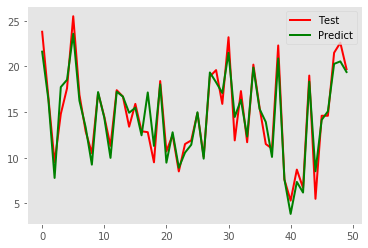

In [15]:
    plt.plot(y_test.values, 'r-', linewidth=2, label='Test')#测试数据的真实值
    plt.plot(y_hat, 'g-', linewidth=2, label='Predict')
    plt.legend(loc='upper right')
    plt.grid()
    #plt.show()